### Importando libraries

In [184]:
library(rlang)

In [185]:
library(ggfortify)

In [186]:
library(ggcorrplot)

In [187]:
library(dplyr)

In [188]:
library(tsibble)
library(forecast)
library(ggplot2)

In [189]:
library(fpp3)

### Explorando os dados

In [190]:
# read dataset from csv file and ignore rows with NA values and empty strings or columns with NA values or empty values

df <- read.csv("../data/Dataset- Superstore (2015-2018).csv", header = TRUE, sep = ",", stringsAsFactors = FALSE, na.strings=c("","NA"), dec = ".", strip.white = TRUE, fileEncoding = "UTF-8-BOM", encoding = "UTF-8")
head(df)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,...,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
3,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
4,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
6,6,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600,7,0.00,14.1694


In [191]:
# dimensão do dataset (linhas x colunas)
dim(df)

[1] 9994   21

In [192]:
# info do dataset
str(df)

'data.frame':	9994 obs. of  21 variables:
 $ Row.ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Order.ID     : chr  "CA-2016-152156" "CA-2016-152156" "CA-2016-138688" "US-2015-108966" ...
 $ Order.Date   : chr  "2016/11/08" "2016/11/08" "2016/06/12" "2015/10/11" ...
 $ Ship.Date    : chr  "2016/11/11" "2016/11/11" "2016/06/16" "2015/10/18" ...
 $ Ship.Mode    : chr  "Second Class" "Second Class" "Second Class" "Standard Class" ...
 $ Customer.ID  : chr  "CG-12520" "CG-12520" "DV-13045" "SO-20335" ...
 $ Customer.Name: chr  "Claire Gute" "Claire Gute" "Darrin Van Huff" "Sean O'Donnell" ...
 $ Segment      : chr  "Consumer" "Consumer" "Corporate" "Consumer" ...
 $ Country      : chr  "United States" "United States" "United States" "United States" ...
 $ City         : chr  "Henderson" "Henderson" "Los Angeles" "Fort Lauderdale" ...
 $ State        : chr  "Kentucky" "Kentucky" "California" "Florida" ...
 $ Postal.Code  : int  42420 42420 90036 33311 33311 90032 90032 90032 90032 90032 ...
 $

In [193]:
# dataset summary
summary(df)

     Row.ID       Order.ID          Order.Date       
 Min.   :   1   Length:9994        Length:9994       
 1st Qu.:2499   Class :character   Class :character  
 Median :4998   Mode  :character   Mode  :character  
 Mean   :4998                                        
 3rd Qu.:7496                                        
 Max.   :9994                                        
  Ship.Date          Ship.Mode         Customer.ID       
 Length:9994        Length:9994        Length:9994       
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         
 Customer.Name        Segment            Country         
 Length:9994        Length:9994        Length:9994       
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mod

Tipos de dados por coluna

In [194]:
table(sapply(df, class))


character   integer   numeric 
       15         3         3 

`Unique values` em cada coluna

In [195]:
sapply(df, function(x) length(unique(x)))

Row.ID      Order.ID    Order.Date     Ship.Date 
         9994          5009          1237          1334 
    Ship.Mode   Customer.ID Customer.Name       Segment 
            4           793           793             3 
      Country          City         State   Postal.Code 
            1           531            49           631 
       Region    Product.ID      Category  Sub.Category 
            4          1862             3            17 
 Product.Name         Sales      Quantity      Discount 
         1850          5825            14            12 
       Profit 
         7287

Procurando por missing values

In [196]:
sapply(df, function(x) sum(is.na(x)))

Row.ID      Order.ID    Order.Date     Ship.Date 
            0             0             0             0 
    Ship.Mode   Customer.ID Customer.Name       Segment 
            0             0             0             0 
      Country          City         State   Postal.Code 
            0             0             0             0 
       Region    Product.ID      Category  Sub.Category 
            0             0             0             0 
 Product.Name         Sales      Quantity      Discount 
            0             0             0             0 
       Profit 
            0

In [197]:
 cat("Total de missing values:", sum(is.na(df)))

Total de missing values: 0

Procurando por outliers em Sales

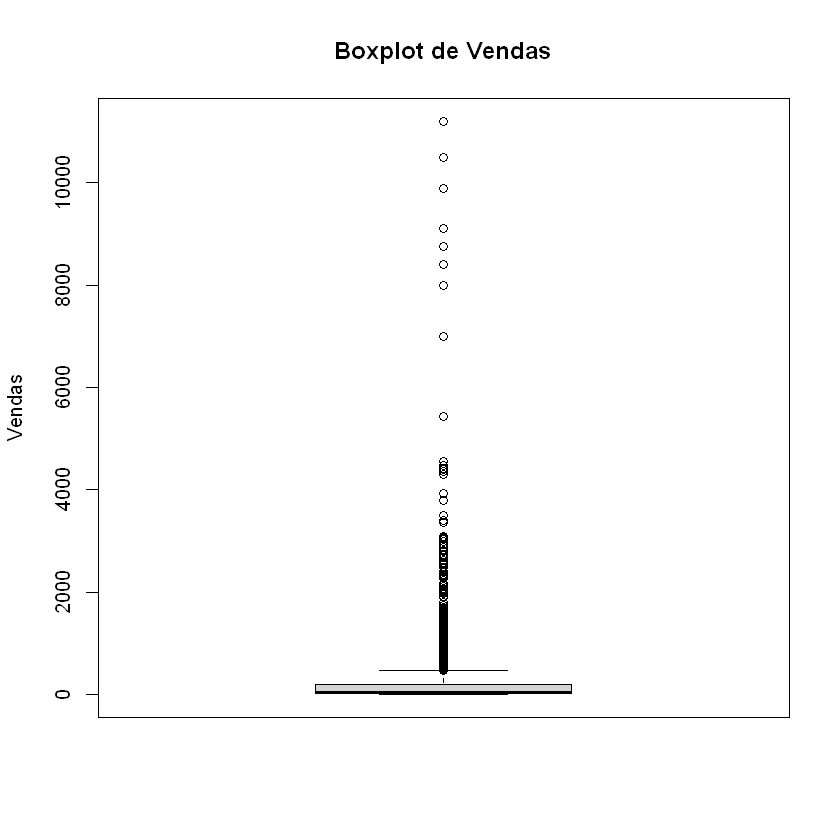

In [243]:
# procurando por outliers em Sales
boxplot(df$Sales, main="Boxplot de Vendas", ylab="Vendas")

# TODO: verificar o que fazer quanto a isto - TG

Convertendo as colunas "Order.Date" e Ship.Date que est'ao como `<chr>` para `<date>`

In [199]:
# Transformar a coluna "Order.Date" e Ship.Date em objeto de data
df$Order.Date <- as_date(df$Order.Date)
df$Ship.Date <- as_date(df$Ship.Date)

In [200]:
# Verificar e remover linhas duplicadas
dupes <- df %>%
  group_by(Order.ID, Order.Date) %>%
  
  # Contar o número de linhas duplicadas da combinacão de Order.ID e Order.Date
  tally() %>%
  
  # Filtrar apenas as linhas duplicadas - ocorrências maiores que 1
  filter(n > 1)

# Se houver linhas duplicadas, remover as linhas duplicadas
if (nrow(dupes) > 0) {
  print("Linhas duplicadas encontradas:")
  print(dupes)
  df <- df %>%
    # Remover linhas duplicadas - distinct mantém a primeira ocorrência
    distinct(Order.ID, Order.Date, .keep_all = TRUE)
  print("Linhas duplicadas removidas.")
}

# Transformar o data.frame em um objeto tsibble
tsib <- as_tsibble(df, key = Order.ID, index = Order.Date)

[1] "Linhas duplicadas encontradas:"
# A tibble: 2,471 x 3
# Groups:   Order.ID [2,471]
   Order.ID       Order.Date     n
   <chr>          <date>     <int>
 1 CA-2014-100090 2014-07-08     2
 2 CA-2014-100363 2014-04-08     2
 3 CA-2014-100678 2014-04-18     4
 4 CA-2014-100706 2014-12-16     2
 5 CA-2014-100762 2014-11-24     4
 6 CA-2014-100895 2014-06-02     3
 7 CA-2014-100916 2014-10-21     3
 8 CA-2014-101560 2014-11-28     4
 9 CA-2014-101602 2014-12-15     2
10 CA-2014-101931 2014-10-28     5
# i 2,461 more rows
[1] "Linhas duplicadas removidas."


Convertendo para tsibble e testando o plot

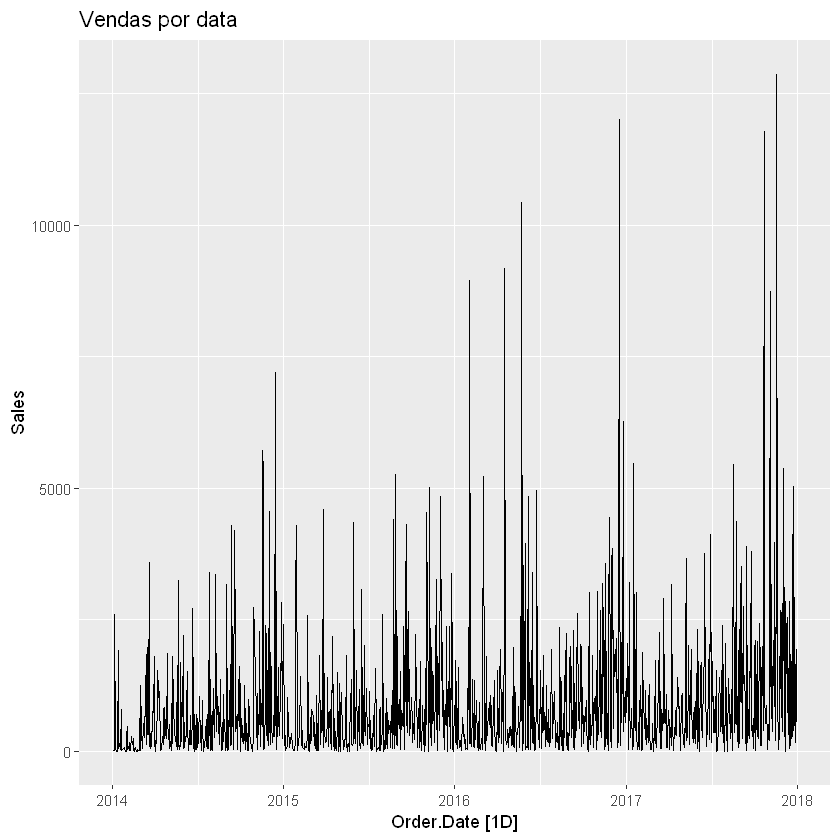

In [201]:
df_ts <- df %>%
  select(Order.Date, Sales) %>%
  group_by(Order.Date) %>%
  summarise(Sales = sum(Sales)) %>%
  ungroup() %>%
  mutate(Order.Date = as.Date(Order.Date)) %>%
  as_tsibble(index = Order.Date)

df_ts %>%
  autoplot(Sales) +
  ggtitle("Vendas por data") +
  geom_line()


In [205]:
head(tsib)

Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,...,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
<int>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
2718,CA-2014-100006,2014-09-07,2014-09-13,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,...,10024,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,377.970,3,0.0,109.6113
6288,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,94122,West,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,502.488,3,0.2,-87.9354
9515,CA-2014-100293,2014-03-14,2014-03-18,Standard Class,NF-18475,Neil Franz<f6>sisch,Home Office,United States,Jacksonville,...,32216,South,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,91.056,6,0.2,31.8696
3084,CA-2014-100328,2014-01-28,2014-02-03,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,...,10024,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x 11"", Light Blue",3.928,1,0.2,1.3257
3836,CA-2014-100363,2014-04-08,2014-04-15,Standard Class,JM-15655,Jim Mitchum,Corporate,United States,Glendale,...,85301,West,OFF-FA-10000611,Office Supplies,Fasteners,Binder Clips by OIC,2.368,2,0.2,0.8288
9441,CA-2014-100391,2014-05-25,2014-05-29,Standard Class,BW-11065,Barry Weirich,Consumer,United States,New York City,...,10035,East,OFF-PA-10001471,Office Supplies,Paper,Strathmore Photo Frame Cards,14.620,2,0.0,6.7252


Estudando a `autocorrelação` e `ACF`

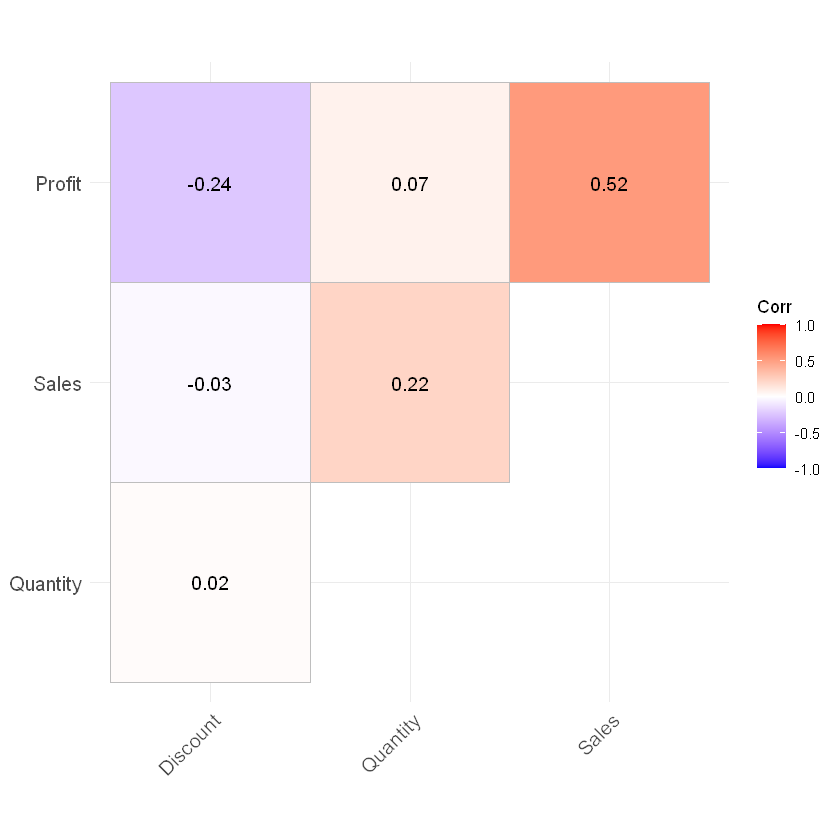

In [206]:
# Criar a matriz de correlação
cor_matrix <- cor(df[,c("Sales", "Quantity", "Discount", "Profit")])

# Plotar a matriz de correlação
ggcorrplot(cor_matrix, hc.order = TRUE, type = "upper", lab = TRUE)

- Verifica-se uma correlação `positiva maior` entre as `vendas` e o `lucro`
- Verifica-se uma correlação `negativa` entre o `lucro` e `desconto`
- Verifica-se uma correlação `positiva modesta` entre a `quantidade` e `vendas`
- Verifica-se uma correlação `negativa tênue` entre a `vendas` e `desconto`
- Verifica-se uma correlação `positiva tênue` entre a `quantidade` e `desconto`

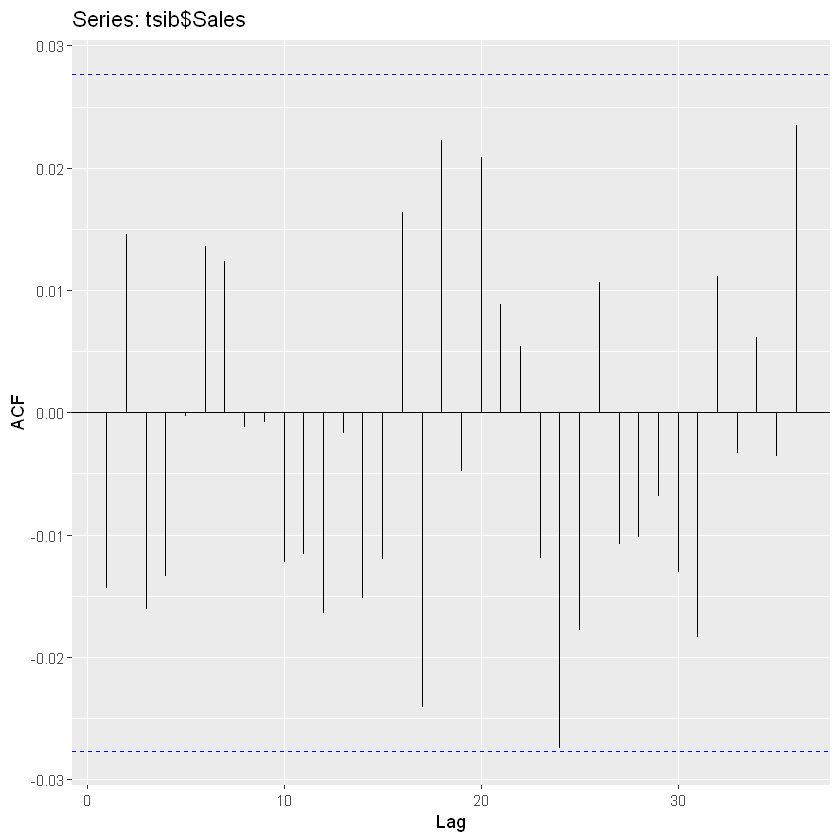

In [207]:
# Plotando a ACF de "Sales"
ggAcf(tsib$Sales)

Aumentando o lag para tentar identificar padrões

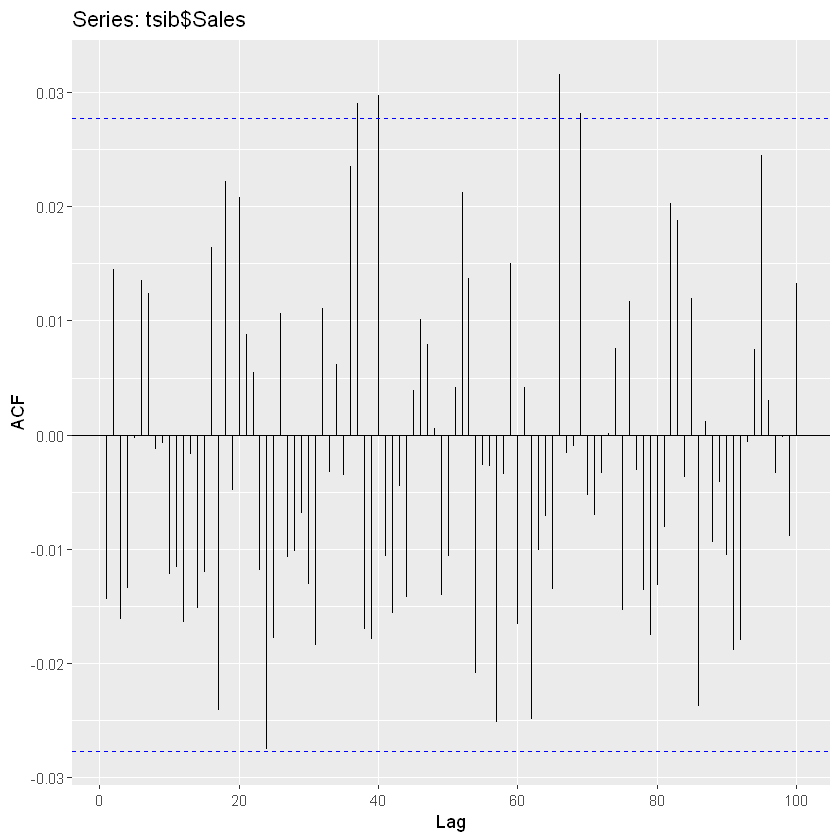

In [208]:
# aumentando o lag para visualizar mais gerações
ggAcf(tsib$Sales, lag.max = 100)

Verificando Profit

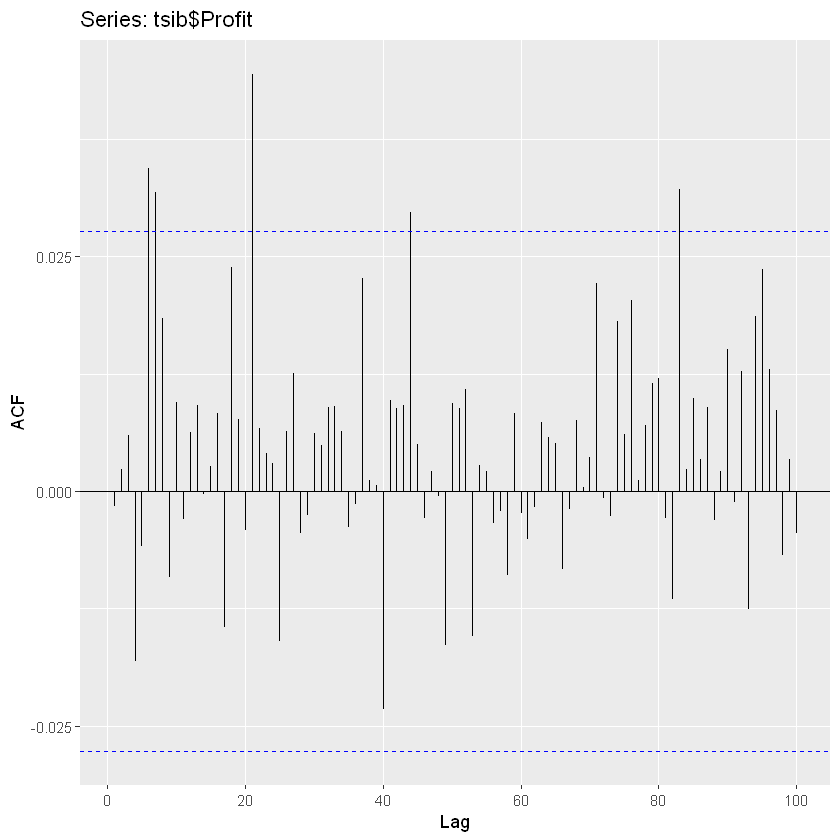

In [209]:
ggAcf(tsib$Profit, lag.max = 100)

Verificando o comportamento de `Sales`, `Quantity`, `Profit` e `Discount` com agregamento mensal

In [210]:
# criando uma nova coluna com o ano e mês
tsib_monthly <- tsib %>%

  # multiplicando por 100 pra criar uma valor sequencial
  mutate(year_month = year(Order.Date) * 100 + month(Order.Date))

# agregando os dados por mês
tsib_monthly <- tsib_monthly %>%
  index_by(year_month) %>%
  summarise(Sales = sum(Sales), Quantity = sum(Quantity), Profit = sum(Profit), Discount = sum(Discount))

tsib_monthly


year_month,Sales,Quantity,Profit,Discount
<dbl>,<dbl>,<int>,<dbl>,<dbl>
201401,6417.102,114,1322.8412,4.45
201402,1860.736,104,547.6046,5.90
201403,19023.950,250,1212.3814,11.90
201404,12415.656,249,1897.6388,6.80
201405,15939.349,272,2116.0751,10.95
201406,13837.698,275,2724.4740,10.40
201407,13562.944,231,-2199.3749,10.00
201408,14667.032,282,2388.8566,9.10
201409,26681.761,491,1695.0435,23.15


Verificando o comportamento das vendas por mês

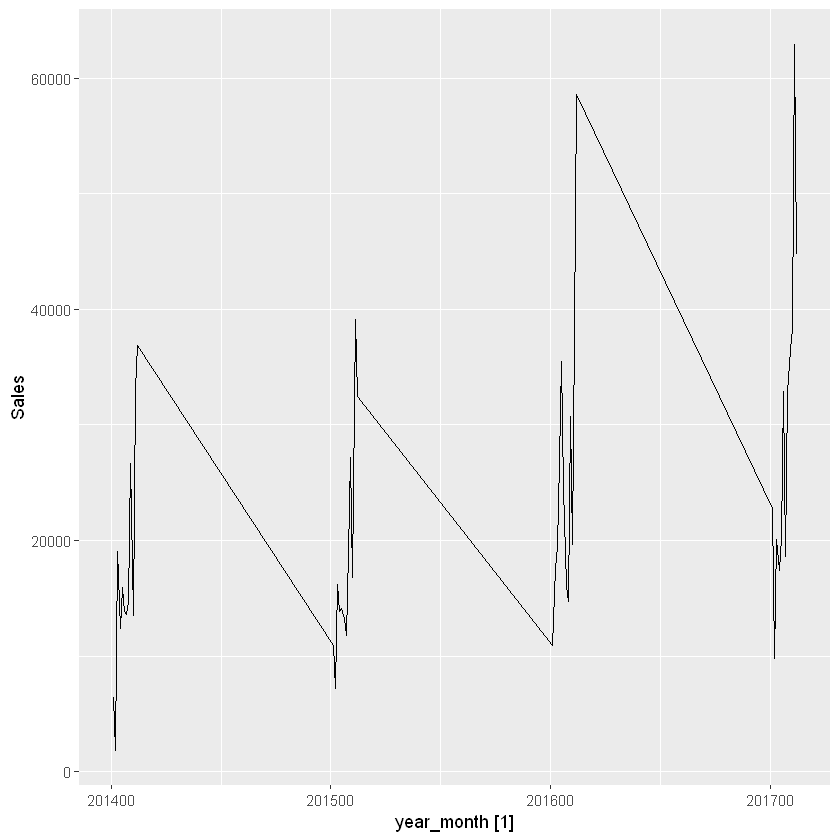

In [211]:
tsib_monthly %>%
  autoplot(Sales)

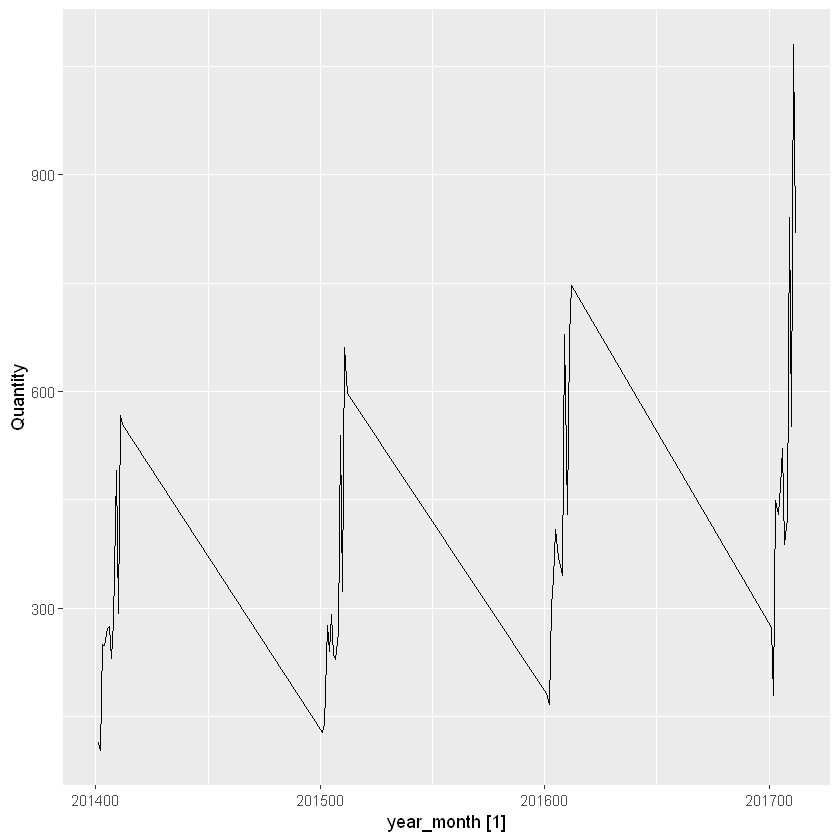

In [212]:
tsib_monthly %>%
  autoplot(Quantity)

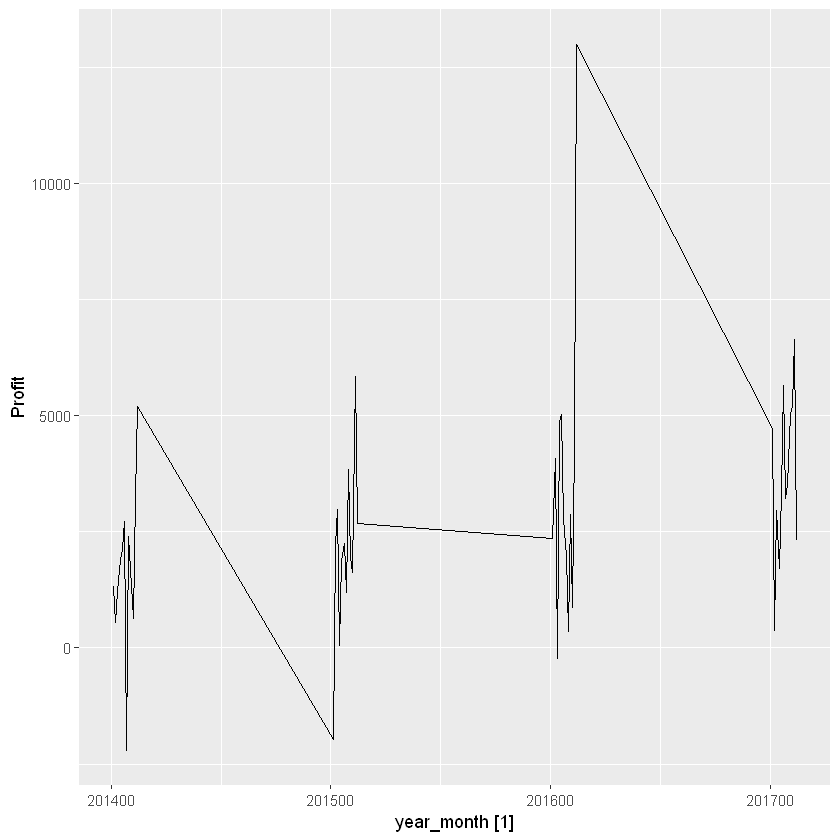

In [213]:
tsib_monthly %>%
  autoplot(Profit)

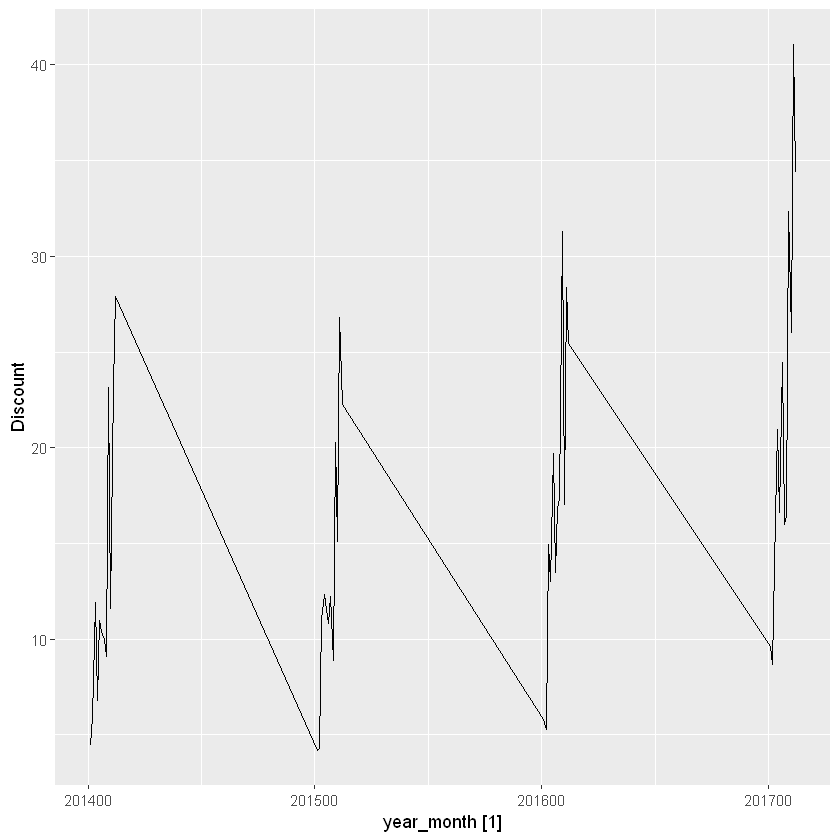

In [214]:
tsib_monthly %>%
  autoplot(Discount)

Preenchendo os gaps com 0

In [215]:
tsib_monthly_filled <- tsib_monthly %>%
  fill_gaps(Sales = 0)

In [216]:
tsib_monthly_filled <- tsib_monthly %>%
  fill_gaps(Sales = 0, Quantity = 0, Profit = 0, Discount = 0)

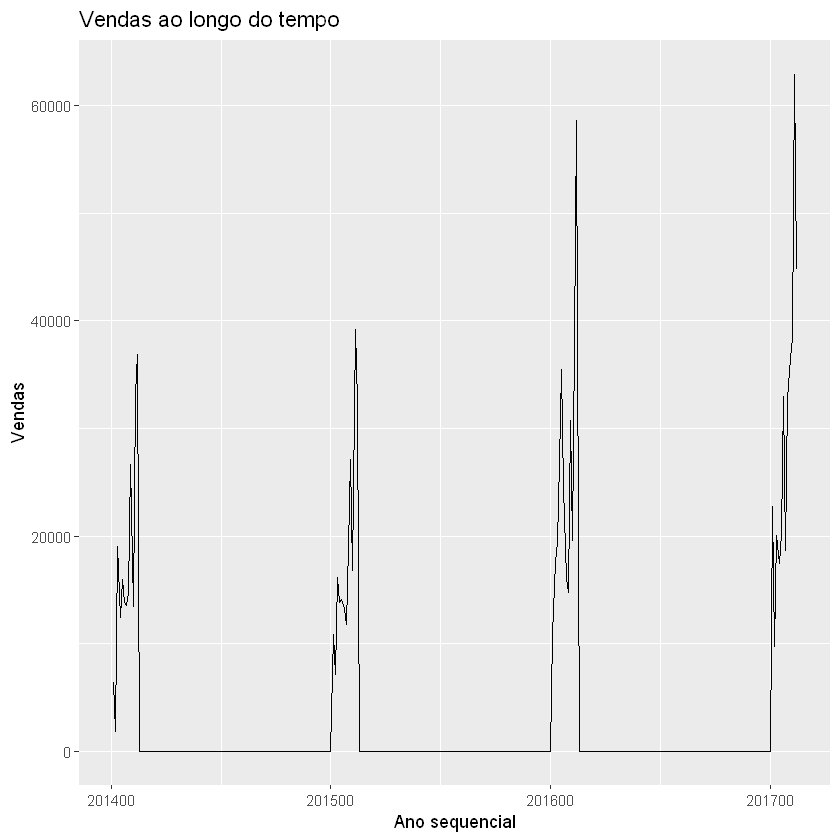

In [217]:
options(width = 60)
tsib_monthly_filled  |>
  autoplot(Sales) +
  labs(title="Vendas ao longo do tempo",
       x="Ano sequencial",
       y="Vendas")

- É possivel perceber que as vendas disparam no início do ano e caem vertiginosamente até assumir valores bem baixo no fim do ano dando início a outro ciclo de crescimento de modo que é possível perceber efeitos de tendência e sazonalidade.
- Posso optar por `Sales` ou qualquer uma das demais vistas acima para previsão visto que o padrão e comportamento é basicamente o mesmo
- A partir daqui vou trabalhar com `Sales`, mas seria proveitoso também utilizar `Profit` em análises futuras pois este deve considerar o lucro frente aos fatores de custos e despesas.

In [219]:
# Agregar os dados por mês
tsib_monthly <- tsib_monthly %>%
  index_by(year_month) %>%
  summarise(Sales = sum(Sales), Quantity = sum(Quantity), Profit = sum(Profit), Discount = sum(Discount))
head(tsib_monthly)

year_month,Sales,Quantity,Profit,Discount
<dbl>,<dbl>,<int>,<dbl>,<dbl>
201401,6417.102,114,1322.8412,4.45
201402,1860.736,104,547.6046,5.90
201403,19023.950,250,1212.3814,11.90
201404,12415.656,249,1897.6388,6.80
201405,15939.349,272,2116.0751,10.95
201406,13837.698,275,2724.4740,10.40


Plotando a Série Temporal de Vendas

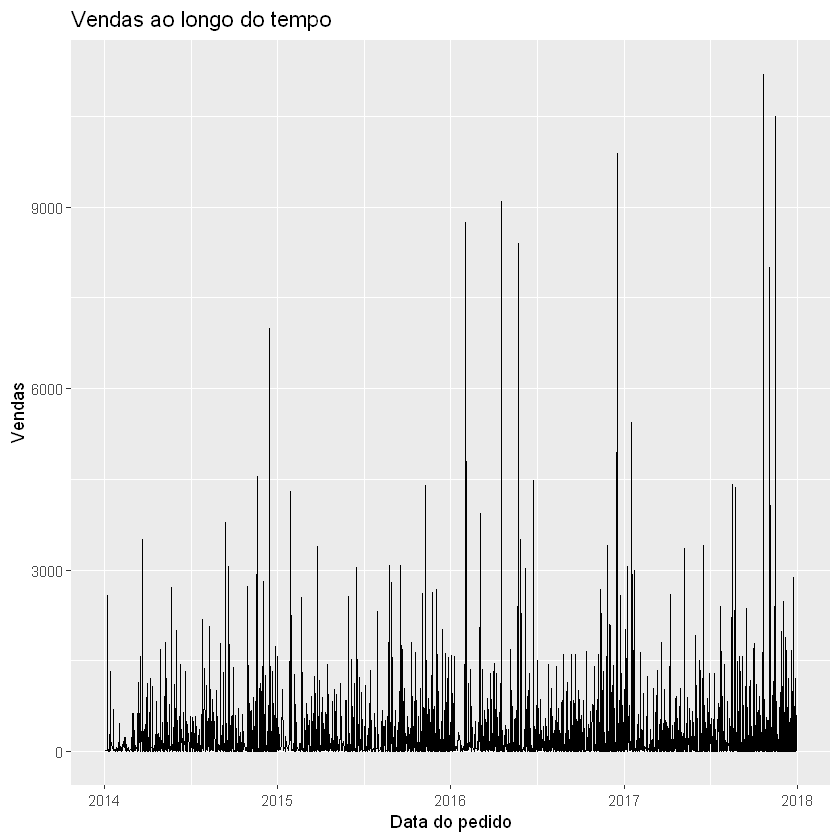

In [220]:
# Plotar a série temporal de vendas
ggplot(tsib, aes(x = Order.Date, y = Sales)) +
  geom_line() +
  labs(title = "Vendas ao longo do tempo",
       x = "Data do pedido",
       y = "Vendas")

A fim de garantir, removendo `missing values` e `substituindo por 0`

In [239]:
df_ts_filled <- df_ts %>%
  tsibble::fill_gaps(Sales = 0)

Decompondo a Série Temporal de Vendas

In [221]:
dcmp <- df_ts_filled %>%
  model(stl = STL(Sales))
components(dcmp)

.model,Order.Date,Sales,trend,season_week,season_year,remainder,season_adjust
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stl,2014-01-03,16.448,546.6315,-130.954620,-74.49014,-324.738771,221.8928
stl,2014-01-04,11.784,546.7766,-16.386812,100.29131,-618.897061,-72.1205
stl,2014-01-05,19.536,546.9216,-217.957855,-251.74324,-57.684507,489.2371
stl,2014-01-06,2606.040,547.0666,639.148224,49.27667,1370.548466,1917.6151
stl,2014-01-07,76.728,547.2117,-7.658663,-672.60359,209.778564,756.9902
stl,2014-01-08,0.000,547.3567,-153.322583,350.21816,-744.252301,-196.8956
stl,2014-01-09,9.344,547.5018,-118.034998,-459.93243,39.809668,587.3114
stl,2014-01-10,2.890,547.6468,-117.870656,-465.08310,38.196950,585.8438
stl,2014-01-11,9.940,547.7918,-8.702446,-597.03211,67.882715,615.6746


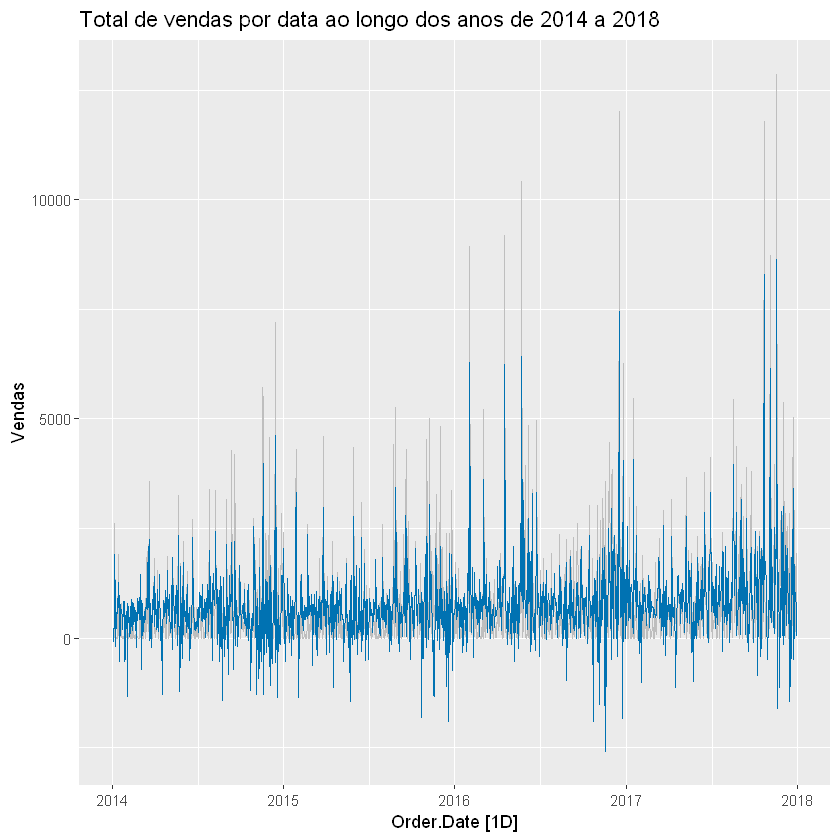

In [242]:
df_ts_filled %>%
  autoplot(Sales, color='gray') +
  autolayer(components(dcmp), season_adjust, color='#0072B2') +
  labs(y="Vendas", title="Total de vendas por data ao longo dos anos de 2014 a 2018")

Decomposição clássica aditiva

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."


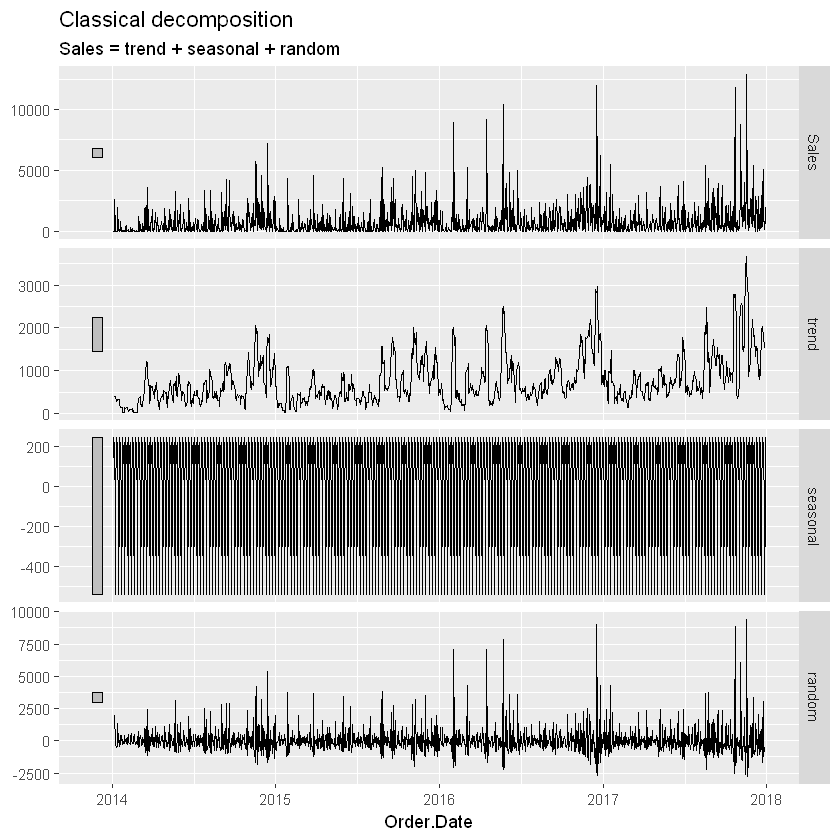

In [223]:
# decompondo a serie temporal com decomposição clássica
df_ts_filled %>%
  model(classical_decomposition(Sales, type = "additive")) %>%
  components() %>%
  autoplot()

Multiplicativa

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."


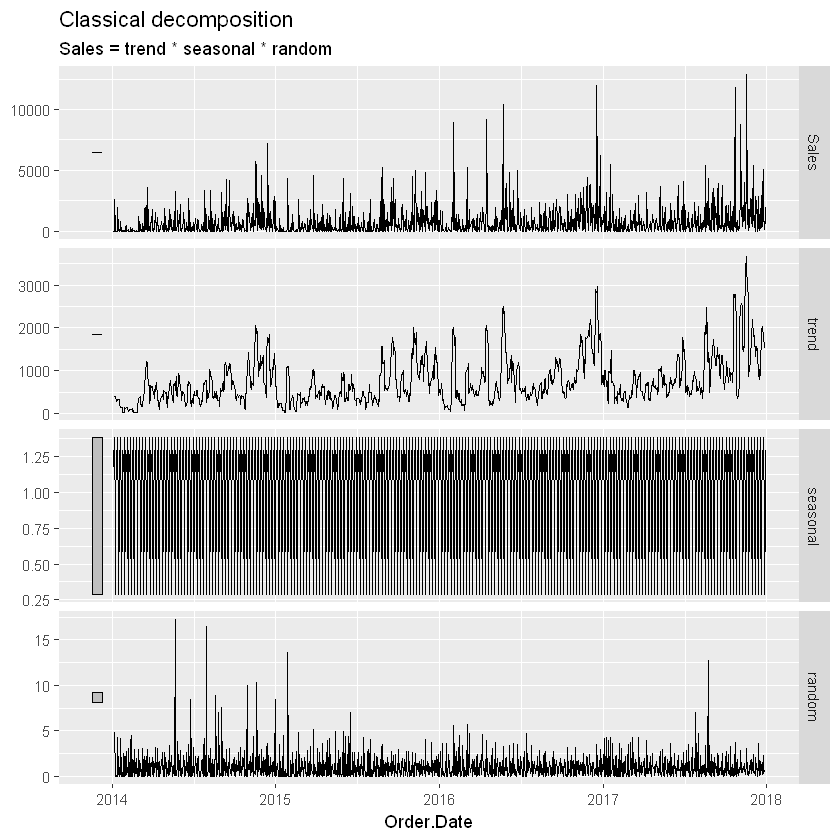

In [224]:
df_ts_filled %>%
  model(classical_decomposition(Sales, type = "multiplicative")) %>%
  components() %>%
  replace_na(list(y = 0)) %>%
  autoplot()

Warning message:
"Removed 7 rows containing missing values (`geom_line()`)."


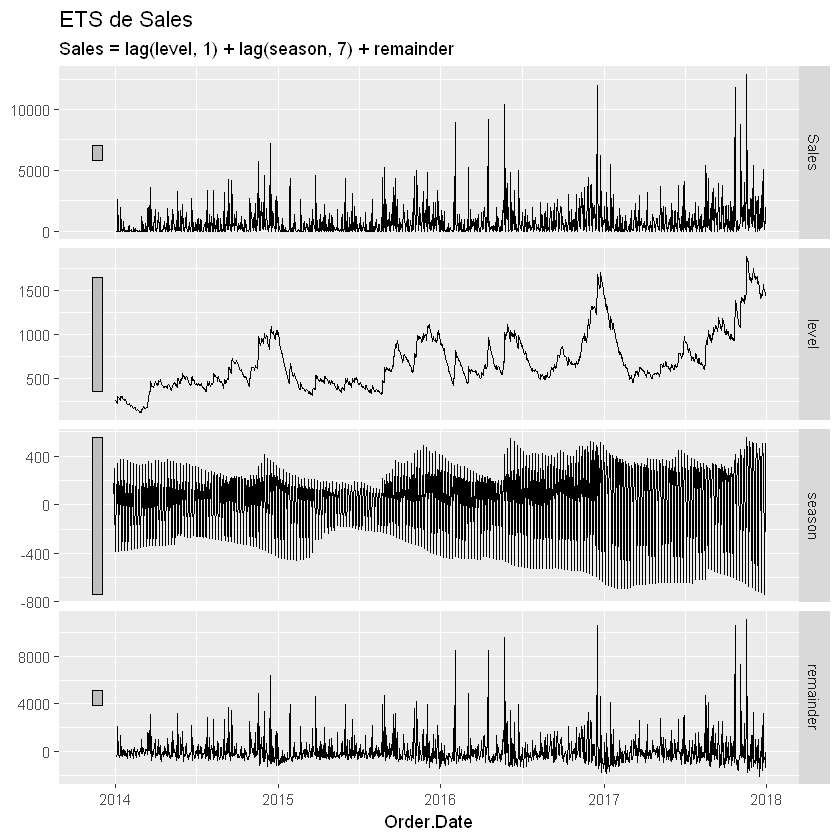

In [225]:
ts_dec <- df_ts_filled %>% 
  
  model(ets = ETS(Sales)) %>% 
  
  components() %>%
  autoplot() +
  labs(title = "ETS de Sales")
ts_dec

Fit usando o modelo TSLM

In [226]:
fit <- df_ts_filled |>
  model(trend_model = TSLM(Sales ~ trend()))
fit

trend_model
<model>
<TSLM>


Produzindo Forecast para 3 anos

In [227]:
fit |> forecast(h = "3 years")

.model,Order.Date,Sales,.mean
<chr>,<date>,<dist>,<dbl>
trend_model,2017-12-31,"N(1153, 1409293)",1152.573
trend_model,2018-01-01,"N(1153, 1409301)",1153.118
trend_model,2018-01-02,"N(1154, 1409309)",1153.664
trend_model,2018-01-03,"N(1154, 1409317)",1154.210
trend_model,2018-01-04,"N(1155, 1409325)",1154.756
trend_model,2018-01-05,"N(1155, 1409333)",1155.302
trend_model,2018-01-06,"N(1156, 1409341)",1155.848
trend_model,2018-01-07,"N(1156, 1409349)",1156.394
trend_model,2018-01-08,"N(1157, 1409357)",1156.940


Visualizando o Forecast

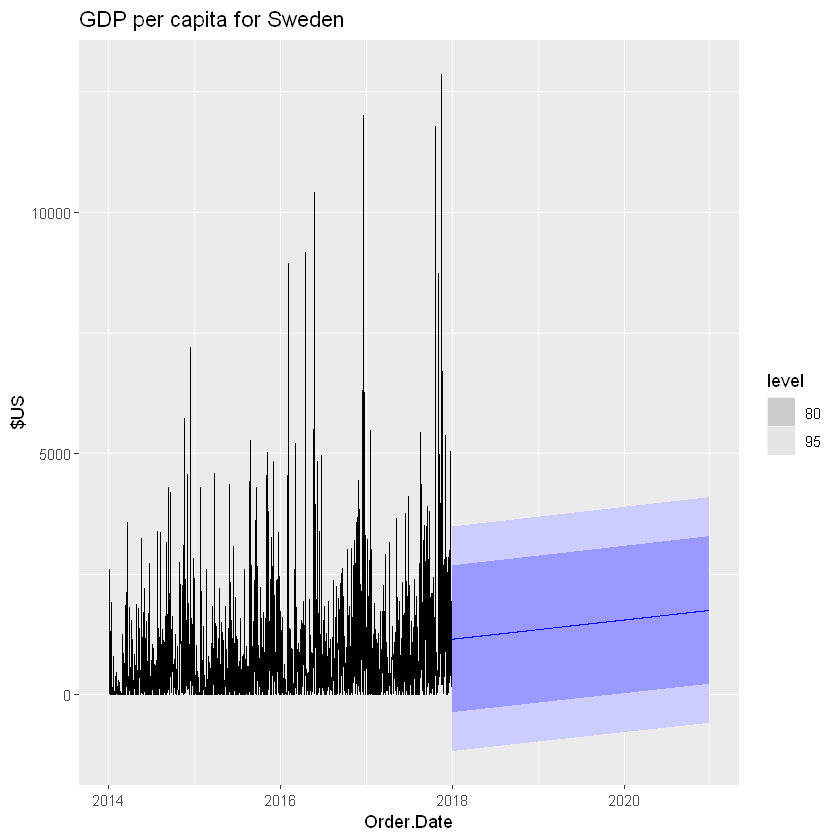

In [228]:
fit %>% forecast(h = "3 years") |>
  
  autoplot(df_ts_filled) +
    labs(title = "GDP per capita for Sweden", y = "$US")

Usando `MEAN` para prever os próximos 3 anos

  * Forecast de todos os valores futuros é igual a média dos dados históricos $\{y_1,\dots,y_T\}$.
  * Forecasts: $\hat{y}_{T+h|T} = \bar{y} = (y_1+\dots+y_T)/T$

In [229]:
#filter com Sales not na (pra garantir) e maior que 0 
sales <- df_ts_filled |>
  filter(!is.na(Sales) & Sales > 0) |>
  mutate(average = mean(Sales))

In [230]:
head(sales)

Order.Date,Sales,average
<date>,<dbl>,<dbl>
2014-01-03,16.448,889.1367
2014-01-04,11.784,889.1367
2014-01-05,19.536,889.1367
2014-01-06,2606.040,889.1367
2014-01-07,76.728,889.1367
2014-01-09,9.344,889.1367


In [231]:
fc <- sales |>
  filter(row_number() == n()) %>% as_tibble() |>
  unnest(Order.Date = list(as.Date(Order.Date) + months(c(0, 12*5))))

fc

Warning message:
"`unnest()` has a new interface. See `?unnest` for details.
i Try `df %>% unnest(c(Order.Date))`, with `mutate()` if
  needed."


Order.Date,Sales,average
<date>,<dbl>,<dbl>
2017-12-30,549.364,889.1367
2022-12-30,549.364,889.1367


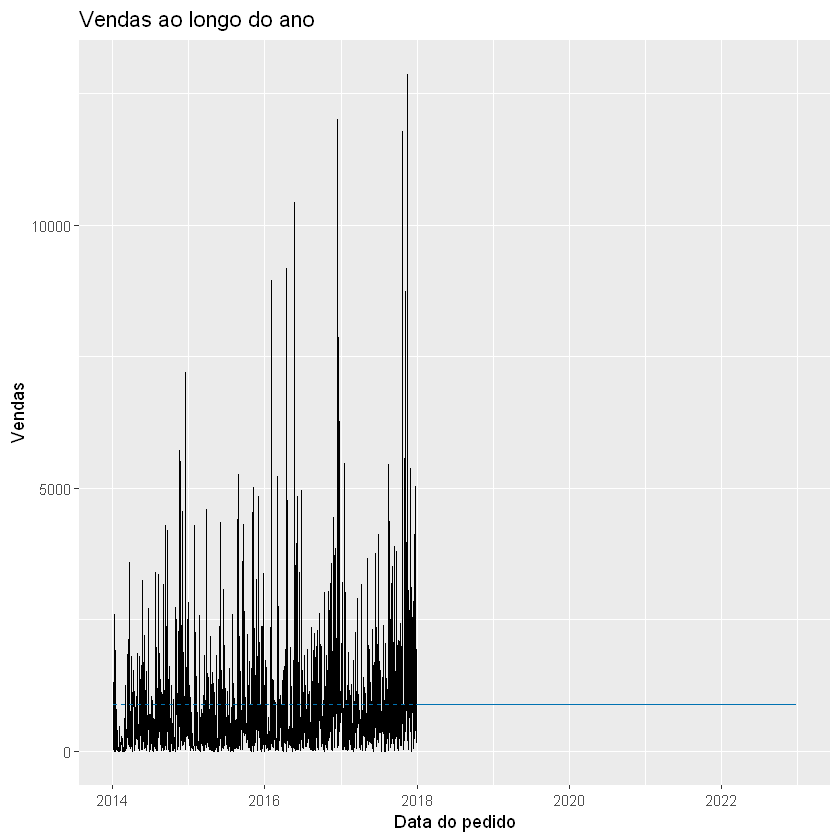

In [232]:
sales |>
  ggplot(aes(x = Order.Date, y = Sales)) +
  geom_line() +
  geom_line(aes(y = average), colour = "#0072B2", linetype = "dashed") +
  geom_line(aes(y = average), data = fc, colour = "#0072B2") +
  labs(title = "Vendas ao longo do ano",
       x = "Data do pedido",
       y = "Vendas")

Plot variable not specified, automatically selected `.vars = Sales`


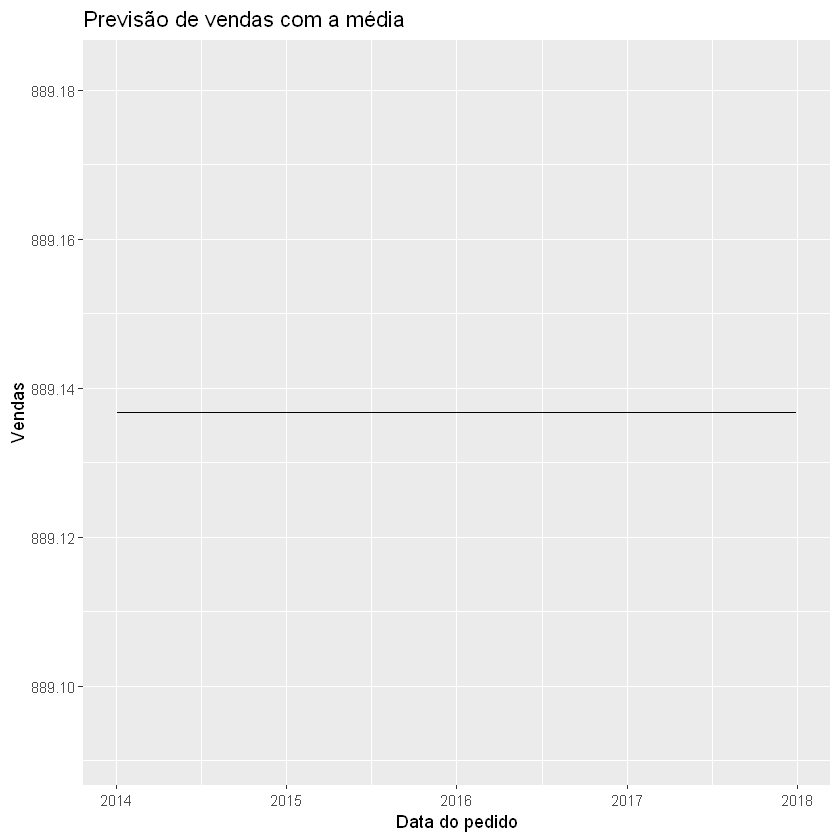

In [233]:
df_ts_filled %>%
  filter(!is.na(Sales) & Sales > 0) %>%
  mutate(Sales = mean(Sales)) %>%
  autoplot() +
  labs(title = "Previsão de vendas com a média",
       x = "Data do pedido",
       y = "Vendas")

`Naive` method

  * Forecasts iguais ao último valor observado.
  * Forecasts: $\hat{y}_{T+h|T} =y_T$.
  * Consequência da hipótese de mercado eficiente.

In [234]:
sales <- df_ts_filled |>
  filter(!is.na(Sales) & Sales > 0)

Warning message:
"1 error encountered for NAIVE(Sales)
[1] .data contains implicit gaps in time. You should check your data and convert implicit gaps into explicit missing values using `tsibble::fill_gaps()` if required.
"
Warning message:
"Removed 1096 rows containing missing values (`()`)."


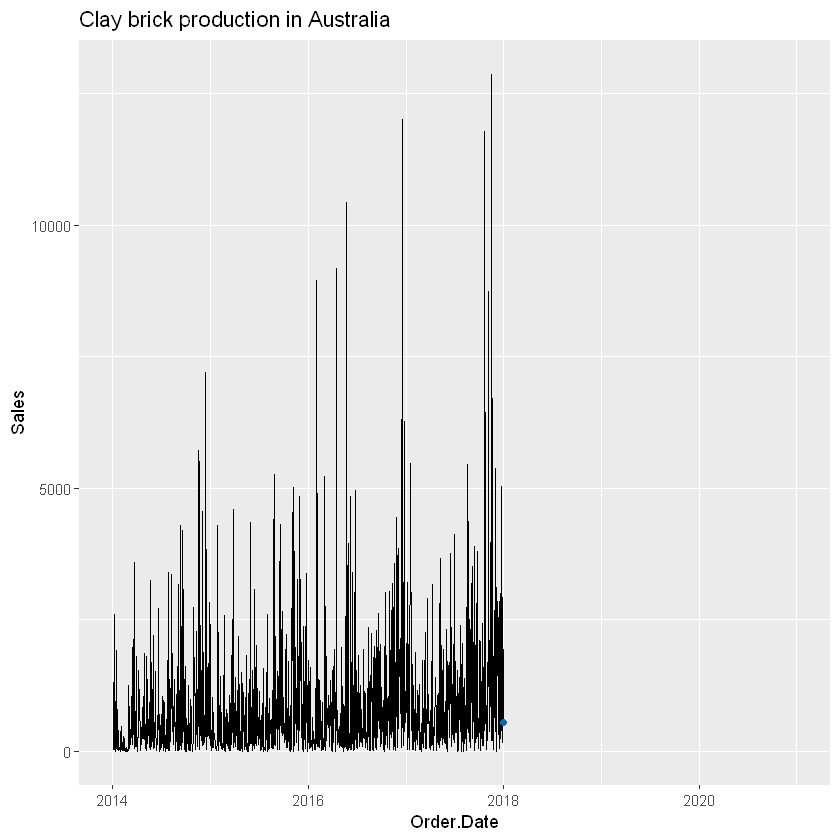

In [235]:
sales |>
  filter(!is.na(Sales) & Sales > 0 & Sales ) |>
  model(NAIVE(Sales)) |>
  forecast(h = "3 years") |>
  autoplot(filter(sales, year(Order.Date) >= 2014), level = NULL) +
  geom_point(data = slice(sales, n()), aes(y=Sales), colour = "#0072B2") +
  labs(title = "Clay brick production in Australia")

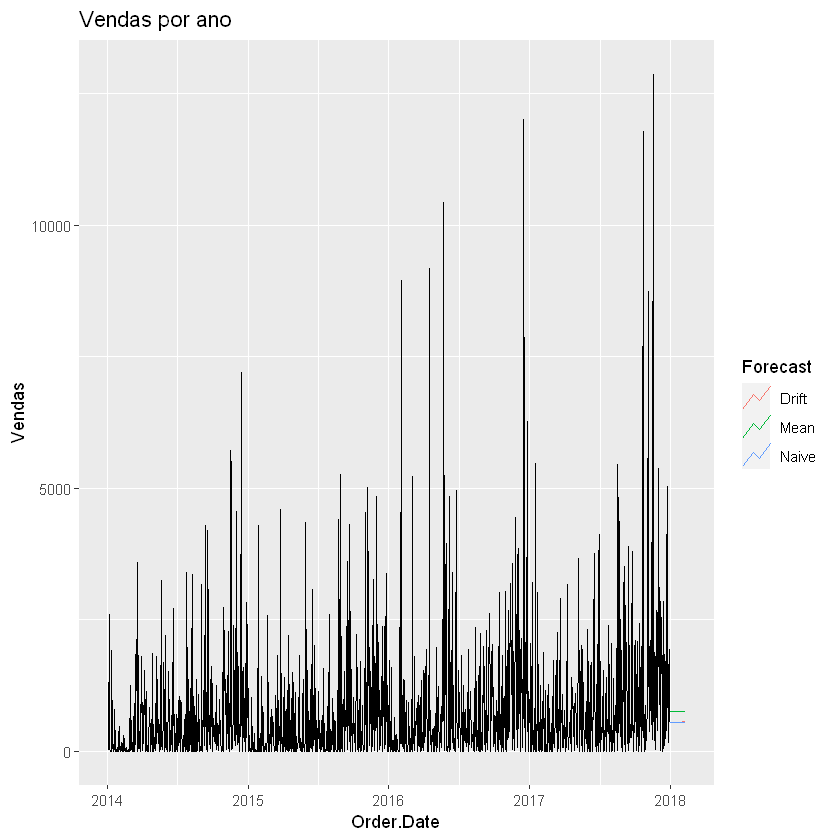

In [236]:
# Specify, estimate and forecast
df_ts_filled %>%
  model(
    Mean = MEAN(Sales),
    Naive = NAIVE(Sales),
    Drift = RW(Sales ~ drift())
  ) |>
  
  forecast(h=42) %>%
  autoplot(df_ts_filled, level = NULL) +
  labs(title = "Vendas por ano", y="Vendas") +
  guides(colour=guide_legend(title="Forecast"))

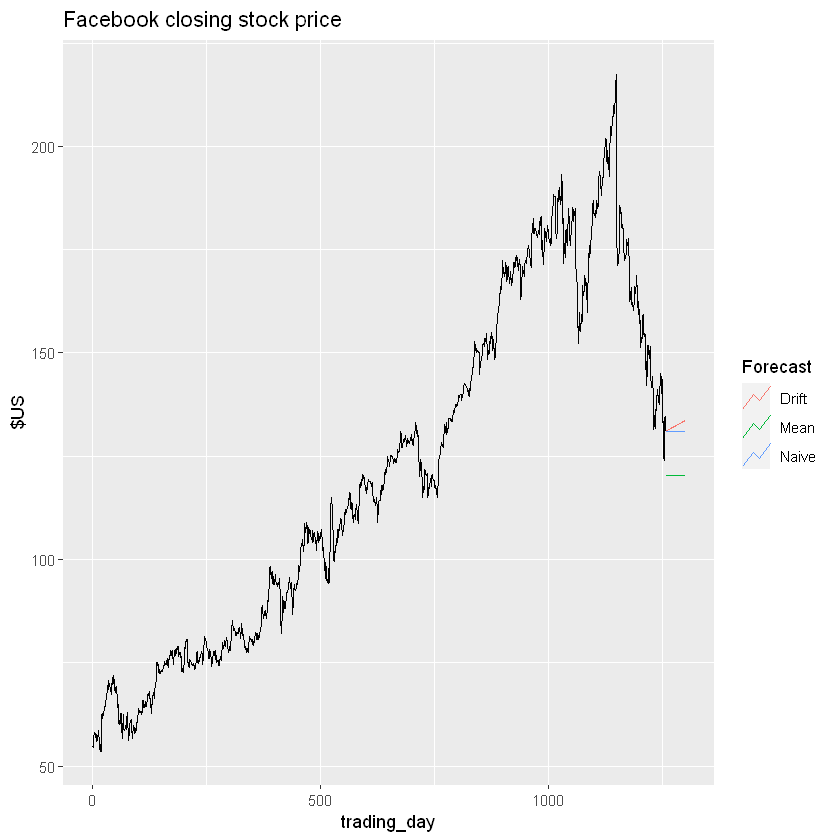

In [237]:
# Extract training data
fb_stock <- gafa_stock |>
  filter(Symbol == "FB") |>
  mutate(trading_day = row_number()) |>
  update_tsibble(index=trading_day, regular=TRUE)

# Specify, estimate and forecast
fb_stock |>
  model(
    Mean = MEAN(Close),
    Naive = NAIVE(Close),
    Drift = RW(Close ~ drift())
  ) |>
  forecast(h=42) |>
  autoplot(fb_stock, level = NULL) +
  labs(title = "Facebook closing stock price", y="$US") +
  guides(colour=guide_legend(title="Forecast"))

In [ ]:
fill_all_gaps <- function(df, fill_value = 0) {
  ts <- df %>% gather(col, val) %>% group_by(col) %>% mutate(idx = row_number()) %>% 
    ungroup() %>% complete(col, idx = min(idx):max(idx)) %>% 
    fill(val, .direction = "downup", fill_value) %>% 
    spread(col, val)
  return(ts)
}



tsib_filled <- fill_all_gaps(tsib)
head(tsib_filled)

Warning message:
"attributes are not identical across measure variables; they
will be dropped"


ERROR: [1m[33mError[39m in `build_tsibble()`:[22m
[33m![39m Can't subset columns that don't exist.
[31mx[39m Column `Order.ID` doesn't exist.


In [ ]:
tsib

ï..Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,...,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,year_month
<int>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2718,CA-2014-100006,2014-09-07,2014-09-13,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,...,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,377.970,3,0.0,109.6113,201409
6288,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,West,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,502.488,3,0.2,-87.9354,201407
9515,CA-2014-100293,2014-03-14,2014-03-18,Standard Class,NF-18475,Neil FranzÃ¶sisch,Home Office,United States,Jacksonville,...,South,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,91.056,6,0.2,31.8696,201403
3084,CA-2014-100328,2014-01-28,2014-02-03,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,...,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x 11"", Light Blue",3.928,1,0.2,1.3257,201401
3836,CA-2014-100363,2014-04-08,2014-04-15,Standard Class,JM-15655,Jim Mitchum,Corporate,United States,Glendale,...,West,OFF-FA-10000611,Office Supplies,Fasteners,Binder Clips by OIC,2.368,2,0.2,0.8288,201404
9441,CA-2014-100391,2014-05-25,2014-05-29,Standard Class,BW-11065,Barry Weirich,Consumer,United States,New York City,...,East,OFF-PA-10001471,Office Supplies,Paper,Strathmore Photo Frame Cards,14.620,2,0.0,6.7252,201405
6569,CA-2014-100678,2014-04-18,2014-04-22,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Houston,...,Central,OFF-AR-10001868,Office Supplies,Art,Prang Dustless Chalk Sticks,2.688,2,0.2,1.0080,201404
9020,CA-2014-100706,2014-12-16,2014-12-18,Second Class,LE-16810,Laurel Elliston,Consumer,United States,Springfield,...,South,TEC-AC-10001314,Technology,Accessories,Case Logic 2.4GHz Wireless Keyboard,99.980,2,0.0,7.9984,201412
6315,CA-2014-100762,2014-11-24,2014-11-29,Standard Class,NG-18355,Nat Gilpin,Corporate,United States,Jackson,...,Central,OFF-AR-10000380,Office Supplies,Art,"Hunt PowerHouse Electric Pencil Sharpener, Blue",151.920,4,0.0,45.5760,201411


In [ ]:
# Count missing values in each column of the dataset
missing_counts <- colSums(is.na(tsib))

# Display the missing value counts
print(missing_counts)

    ï..Row.ID      Order.ID    Order.Date     Ship.Date 
            0             0             0             0 
    Ship.Mode   Customer.ID Customer.Name       Segment 
            0             0             0             0 
      Country          City         State   Postal.Code 
            0             0             0             0 
       Region    Product.ID      Category  Sub.Category 
            0             0             0             0 
 Product.Name         Sales      Quantity      Discount 
            0             0             0             0 
       Profit 
            0 


In [ ]:
library(tidyverse)

-- Attaching core tidyverse packages ---- tidyverse 2.0.0 --
v forcats 1.0.0     v readr   2.1.4
v purrr   1.0.1     v stringr 1.5.0
-- Conflicts ---------------------- tidyverse_conflicts() --
x purrr::%@%()          masks rlang::%@%()
x dplyr::filter()       masks stats::filter()
x purrr::flatten()      masks rlang::flatten()
x purrr::flatten_chr()  masks rlang::flatten_chr()
x purrr::flatten_dbl()  masks rlang::flatten_dbl()
x purrr::flatten_int()  masks rlang::flatten_int()
x purrr::flatten_lgl()  masks rlang::flatten_lgl()
x purrr::flatten_raw()  masks rlang::flatten_raw()
x lubridate::interval() masks tsibble::interval()
x purrr::invoke()       masks rlang::invoke()
x dplyr::lag()          masks stats::lag()
x purrr::splice()       masks rlang::splice()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:

library(dplyr)
library(lubridate)
library(forecast)
library(imputeTS)



tsib %>% model(classical_decomposition(Sales, type = "additive")) %>% 
  components() %>%
  autoplot() +
  labs(title = "Classical additive decomposition of Sales")


Warning message:
"5009 errors (1 unique) encountered for classical_decomposition(Sales, type = "additive")
[5009] time series has no or less than 2 periods
"


ERROR: [1m[33mError[39m in `transmute()`:[22m
[1m[22m[36mi[39m In argument: `cmp = map(.fit, components)`.
[1mCaused by error in `UseMethod()`:[22m
[33m![39m método não aplicável para 'components' aplicado a um objeto de classe "null_mdl"


In [ ]:
library(tidyverse)
library(forecast)

# create example time series data with missing values
set.seed(123)
tsib <- tibble(Date = seq(as.Date("2020-01-01"), as.Date("2021-12-31"), by = "day"),
               Sales = sample(c(1:100, NA), size = length(Date), replace = TRUE))

# fill missing values using tidyr
tsib_filled <- tsib %>% 
  fill(Sales)

# apply classical decomposition
tsib_decomposed <- tsib_filled %>%
  model(classical_decomposition(Sales, type = "additive")) %>% 
  components()

# plot the decomposed components
autoplot(tsib_decomposed, facets = TRUE) + labs(title = "Classical additive decomposition of Sales")


ERROR: Error in UseMethod("model"): método não aplicável para 'model' aplicado a um objeto de classe "c('tbl_df', 'tbl', 'data.frame')"


In [ ]:

tsib_model <- tsib %>% 
  fill_missing() %>% 
  model(classical_decomposition(Sales, type = "additive"))

tsib_components <- tsib_model %>% 
  components()

tsib_components %>% 
  autoplot() +
  labs(title = "Classical additive decomposition of Sales")


ERROR: Error in fill_missing(.): não foi possível encontrar a função "fill_missing"


In [ ]:

library(forecast)
library(imputeTS)

# Fill missing values with the mean of the column
#tsib_filled <- tsib %>%
 # mutate(Sales = imputeTS(Sales, method = "mean"))

# decompose the time series
tsib_decomposed <- tsib %>%
  model(
    classical_decomposition(Sales, type = "additive")
  ) %>%
  components()

# plot the decomposed components
tsib_decomposed %>%
  autoplot() +
  labs(title = "Classical additive decomposition of Sales")

Warning message:
"5009 errors (1 unique) encountered for classical_decomposition(Sales, type = "additive")
[5009] time series has no or less than 2 periods
"


ERROR: [1m[33mError[39m in `transmute()`:[22m
[1m[22m[36mi[39m In argument: `cmp = map(.fit, components)`.
[1mCaused by error in `UseMethod()`:[22m
[33m![39m método não aplicável para 'components' aplicado a um objeto de classe "null_mdl"


In [ ]:
tsib %>%
  model(
    classical_decomposition(Sales, type = "additive")
  ) %>%
  components() %>%
  autoplot() +
  labs(title = "Classical additive decomposition of Sales")

Warning message:
"5009 errors (1 unique) encountered for classical_decomposition(Sales, type = "additive")
[5009] time series has no or less than 2 periods
"


ERROR: [1m[33mError[39m in `transmute()`:[22m
[1m[22m[36mi[39m In argument: `cmp = map(.fit, components)`.
[1mCaused by error in `UseMethod()`:[22m
[33m![39m método não aplicável para 'components' aplicado a um objeto de classe "null_mdl"


In [ ]:
library(lubridate)

# Convert Year column to year class
tsib_monthly_filled$Year <- as.character(tsib_monthly_filled$Year)
tsib_monthly_filled$Year <- ymd(paste0(tsib_monthly_filled$Year, "-01-01"))

# Verify class of Year column
class(tsib_monthly_filled$Year)


Warning message:
"Unknown or uninitialised column: `Year`."


ERROR: [1m[33mError[39m in `$<-`:[22m
[1m[22m[33m![39m Assigned data `value` must be compatible with
  existing data.
[31mx[39m Existing data has 312 rows.
[31mx[39m Assigned data has 0 rows.
[36mi[39m Only vectors of size 1 are recycled.
[1mCaused by error in `vectbl_recycle_rhs_rows()`:[22m
[33m![39m Can't recycle input of size 0 to size 312.


In [ ]:
tsib_monthly_filled %>%
  model(
    classical_decomposition(Sales, type = "additive")
  ) %>%
  components() %>%
  autoplot() +
  labs(title = "Classical additive decomposition of Sales")

Warning message:
"1 error encountered for classical_decomposition(Sales, type = "additive")
[1] time series has no or less than 2 periods
"


ERROR: [1m[33mError[39m in `transmute()`:[22m
[1m[22m[36mi[39m In argument: `cmp = map(.fit, components)`.
[1mCaused by error in `UseMethod()`:[22m
[33m![39m método não aplicável para 'components' aplicado a um objeto de classe "null_mdl"


In [ ]:
# Decompor a série temporal de vendas em tendência, sazonalidade e erro
#tsib_decomposed <- tsib %>%
#  model(stl = STL(Sales))

# Visualizar a decomposição da série temporal
#plot(tsib_decomposed)


In [ ]:
# decompor a série temporal de vendas em tendência, sazonalidade e erro
decomposed = stl(tsib_monthly$Sales)

ERROR: Error in stl(tsib_monthly$Sales): series is not periodic or has less than two periods


In [ ]:
# Verificar se há lacunas
missing_months <- tsib_monthly %>%
  filter(is.na(Sales)) %>%
  pull(year_month)
if (length(missing_months) > 0) {
  cat("Há lacunas nos seguintes meses:\n")
  cat(missing_months, "\n")
} else {
  cat("Não há lacunas nos meses.\n")
}

Não há lacunas nos meses.


In [ ]:
# Decompor a série temporal
tsib_decomp <- tsib_monthly %>%
  model(stl = STL(Sales))

# Visualizar a decomposição
autoplot(tsib_decomp, facet = TRUE) +
  xlab("Mês") +
  ggtitle("Decomposição da série temporal")


Warning message:
"1 error encountered for stl
[1] .data contains implicit gaps in time. You should check your data and convert implicit gaps into explicit missing values using `tsibble::fill_gaps()` if required.
"


ERROR: [1m[33mError[39m in `autoplot()`:[22m
[1m[22m[33m![39m Objects of class [34m<mdl_df>[39m are not supported by autoplot.
[36mi[39m have you loaded the required package?


In [ ]:
tsib_monthly_filled <- tsib_monthly %>%
  fill_gaps(Sales = 0)

In [ ]:
# Decompor a série temporal
tsib_decomp <- tsib_monthly_filled %>%
  model(stl = STL(Sales))


In [ ]:
dd <- decompose(tsib_monthly_filled$Sales)

ERROR: Error in decompose(tsib_monthly_filled$Sales): time series has no or less than 2 periods


In [ ]:

# Visualizar a decomposição
autoplot(tsib_decomp, facet = TRUE) +
  xlab("Mês") +
  ggtitle("Decomposição da série temporal")


ERROR: [1m[33mError[39m in `autoplot()`:[22m
[1m[22m[33m![39m Objects of class [34m<mdl_df>[39m are not supported by autoplot.
[36mi[39m have you loaded the required package?


In [ ]:
library(seasonal)


Attaching package: 'seasonal'


The following object is masked from 'package:tibble':

    view




In [ ]:
library(forecast)

# Extrair a componente sazonal da decomposição STL
seasonal <- seas(tsib_decomp)

# Plotar a série temporal sazonal
ggseasonplot(seasonal, col = "blue") +
  xlab("Mês") +
  ggtitle("Padrão sazonal da série temporal")


ERROR: Error in align_x_list(x, list): all(sapply(x, inherits, "ts")) is not TRUE


In [ ]:
ggseasonplot(tsib_decomp, col = "blue") + 
  xlab("Mês") + 
  ggtitle("Decomposição da série temporal")


ERROR: Error in ggseasonplot(tsib_decomp, col = "blue"): autoplot.seasonplot requires a ts object, use x=object


In [ ]:
library(feasts)
# plotar a decomposição
ggplot(as.data.frame(tsib_decomp), aes(x = index, y = tsib$Sales)) +
  geom_line() +
  geom_line(aes(y = trend), color = "red") +
  geom_point(aes(y = seasonal), color = "blue") +
  geom_point(aes(y = remainder), color = "green") +
  labs(title = "Decomposição da série temporal",
       x = "Ano-Mês",
       y = "Número de passageiros") +
  theme_bw()

Don't know how to automatically pick scale for object of type <function>.
Defaulting to continuous.
ERROR while rich displaying an object: Error in `geom_line()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error in `compute_aesthetics()`:
! Aesthetics are not valid data columns.
x The following aesthetics are invalid:
x `x = index`
i Did you mistype the name of a data column or forget to add `after_stat()`?

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (